# Preparations

In [1]:
# Env
from Env1_Two_Armed_Bandit import *
from Agent import *
env = Two_Armed_Bandit()

/Users/Marvin/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Save Paths
from datetime import datetime
path = "../Log/train_env1/" + datetime.now().strftime("%m%d-%H:%M:%S")

In [3]:
# Hyperparameters
gamma = 0.75  # Discount factor for past rewards
learning_rate = 7e-4

# Hyperparameters
beta_v = 0.05
beta_e = 0.05

# train
nb_trials = 100
nb_episodes = 15000

In [4]:
# Agent
agent = Agent(learning_rate, gamma, beta_v, beta_e,  #loss func
                 env, nb_trials, nb_episodes,  #train
                 path)

2023-01-11 02:24:31.861827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Training

In [5]:
agent.train()

In [ ]:
# agent.model.save(path+'/model.h5')

# Testing

In [ ]:
test_model = keras.models.load_model('../Log/train_env1/0110-23:29:33/model.h5')
#test_model = agent.model
test_episode = 300

In [ ]:
agent.test(test_model, test_episode, 100)

# Analysis

431 1136792 359 1133059


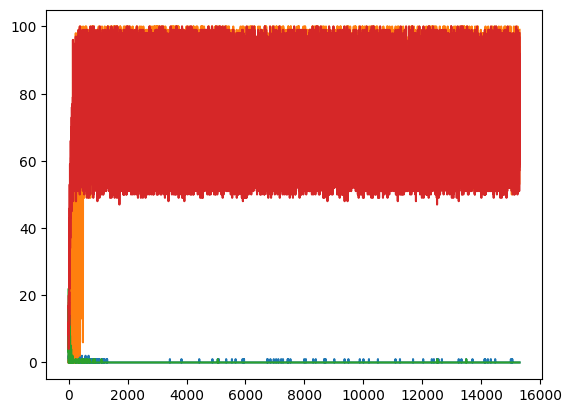

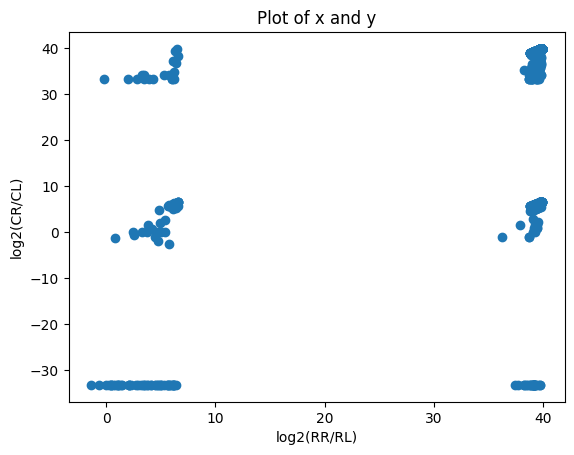

In [ ]:
import math
import matplotlib.pyplot as plt

def plotfigure1(x,y):
    # Make sure that x and y have the same length
    assert len(x) == len(y)
    # Create a figure and an axis
    fig, ax = plt.subplots()
    # ax.set_xlim(-4,4)
    # ax.set_ylim(-4,4)
    # Plot x and y
    ax.scatter(x, y)
    # Add axis labels and a title
    ax.set_xlabel('log2(RR/RL)')
    ax.set_ylabel('log2(CR/CL)')
    ax.set_title('Plot of x and y')
    # Show the plot
    plt.show()

cl,cr,rl,rr = agent.env.get_abcd()

print(sum(cl),sum(cr),sum(rl),sum(rr))
plt.plot(cl)
plt.plot(cr)
plt.plot(rl)
plt.plot(rr)
plt.show()

y = np.log2(np.divide(cr, [x+1e-10 for x in cl])+1e-10)
x = np.log2(np.divide(rr, [x+1e-10 for x in rl])+1e-10)
# #plotfigure1(x,y)
# data = []
# data.append((x,y))
# x,y = list(zip(*data))[0],list(zip(*data))

plotfigure1(x,y)